In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

reading data

In [4]:
df = pd.read_csv("indicator.csv")

In [5]:
paleta="RdBu"
corr_method="pearson"

In [6]:
df.columns= ["crop",
"country",
"c_area_harvested",
"c_production",
"clp_export_quantity",
"clp_export_value",
"clp_import_quantity",
"clp_import_value",
"fs_fat_supply_quantity",
"fs_food_supply_kcal",
"fs_food_supply_quantity_g",
"fs_protein_supply_quantity",
"vap_gross_production_value_us",
"countries-c_area_harvested",
"countries-c_production",
"countries-clp_export_quantity",
"countries-clp_export_value",
"countries-clp_import_quantity",
"countries-clp_import_value",
"countries-fs_fat_supply_quantity",
"countries-fs_food_supply_kcal",
"countries-fs_food_supply_quantity_g",
"countries-fs_protein_supply_quantity",
"countries-vap_gross_production_value_us",
"upov_genus_varietal_release",
"upov_species_varietal_release",
"genus_count_institution_supply",
"genus_count_origin_supply",
"species_count_institution_supply",
"species_count_origin_supply",
"genus_count_mls_supply_accessions",
"species_count_mls_supply_accessions",
"genus_count_mls_supply_institutions",
"species_count_mls_supply_institutions",
"genus_count_gini_institution",
"genus_count_gini_origin",
"species_count_gini_institution",
"species_count_gini_origin",
"idx_g-production",
"idx_g-trade",
"idx_g-",
"idx_c-importance",
"idx_g-production",
"idx_g-trade",
"idx_g-food_supply",
"idx_c-faostat_count_countries",
"idx_d-importance",
"idx_final",
"idx_g-upov_varietal_release",
"idx_c-demand-varietal_release",
"idx_d-demand",
"idx_g-institution_country",
"idx_g-origin_country",
"idx_c-supply-genebank_collections",
"idx_g-germplasm_mls_accessions",
"idx_g-germplasm_mls_institutions",
"idx_c-germplasm_mls",
"idx_d-supply",
"idx_g-gini_genebanks_institution_country",
"idx_g-gini_genebanks_origin_country",
"idx_c-equality_of_supply",
"idx_d-security"]

In [7]:
features_base = ["c_area_harvested",
"c_production",
"clp_export_quantity",
"clp_export_value",
"clp_import_quantity",
"clp_import_value",
"fs_fat_supply_quantity",
"fs_food_supply_kcal",
"fs_food_supply_quantity_g",
"fs_protein_supply_quantity",
"vap_gross_production_value_us",
"countries-c_area_harvested",
"countries-c_production",
"countries-clp_export_quantity",
"countries-clp_export_value",
"countries-clp_import_quantity",
"countries-clp_import_value",
"countries-fs_fat_supply_quantity",
"countries-fs_food_supply_kcal",
"countries-fs_food_supply_quantity_g",
"countries-fs_protein_supply_quantity",
"countries-vap_gross_production_value_us",
"upov_genus_varietal_release",
"upov_species_varietal_release",
"genus_count_institution_supply",
"genus_count_origin_supply",
"species_count_institution_supply",
"species_count_origin_supply",
"genus_count_mls_supply_accessions",
"species_count_mls_supply_accessions",
"genus_count_mls_supply_institutions",
"species_count_mls_supply_institutions",
"genus_count_gini_institution",
"genus_count_gini_origin",
"species_count_gini_institution",
"species_count_gini_origin"]

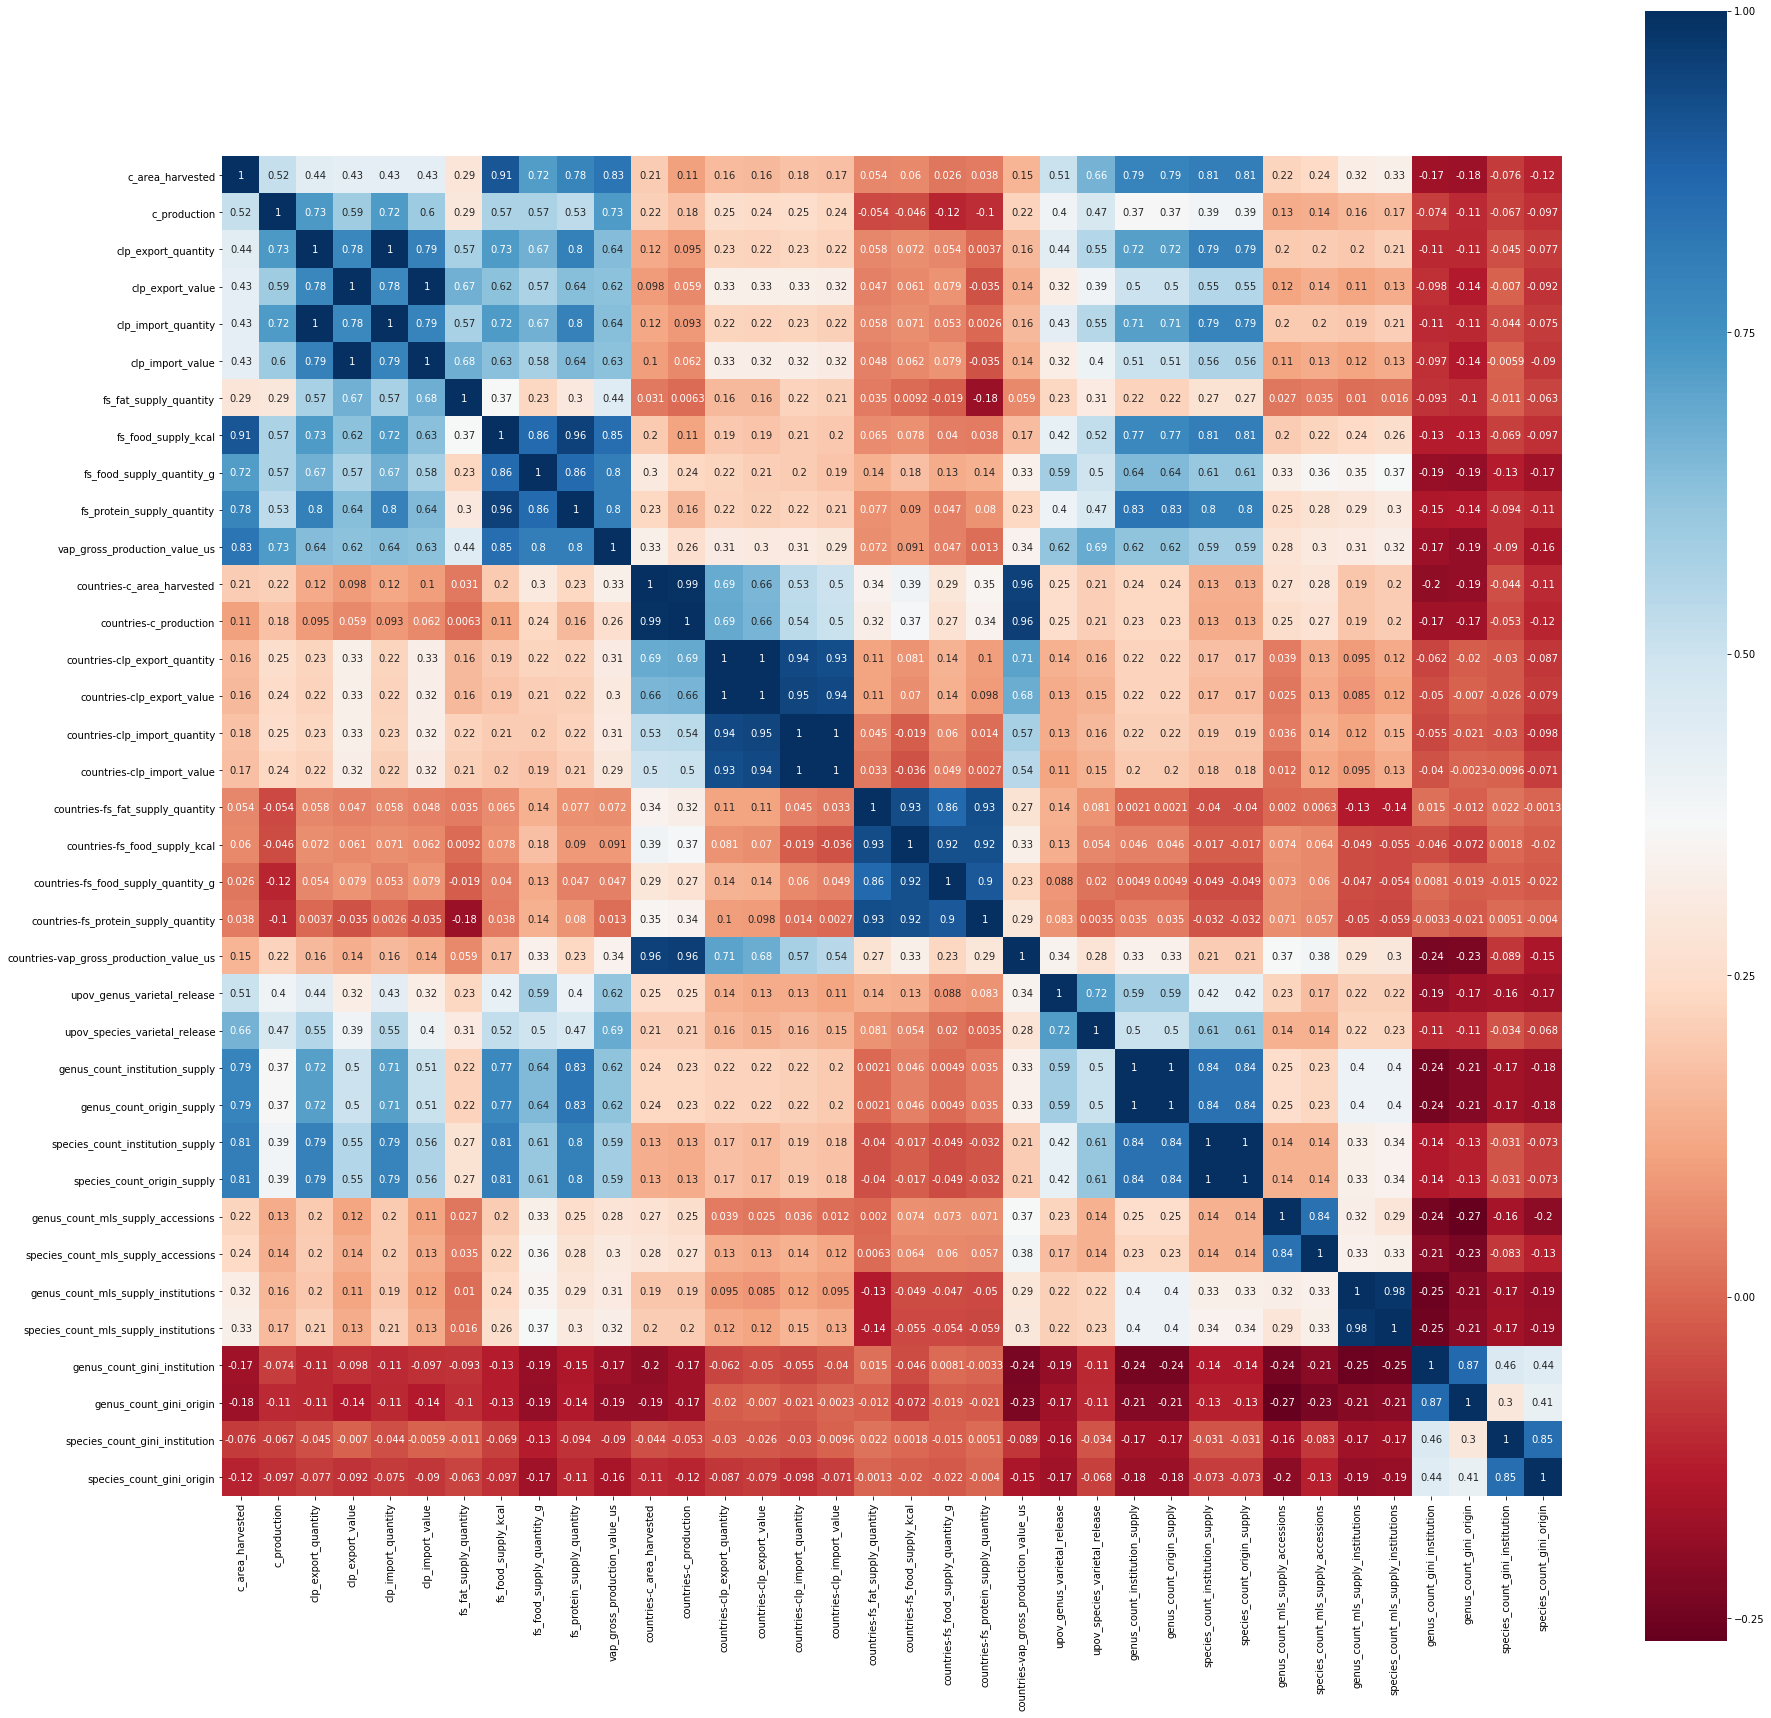

In [9]:
correlation = df.loc[:, features_base].corr(method=corr_method)
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap=paleta)
plt.savefig('features_base.png')

In [16]:
features_importance = ["c_area_harvested",
"c_production",
"clp_export_quantity",
"clp_export_value",
"clp_import_quantity",
"clp_import_value",
"fs_fat_supply_quantity",
"fs_food_supply_kcal",
"fs_food_supply_quantity_g",
"fs_protein_supply_quantity",
"vap_gross_production_value_us",
"countries-c_area_harvested",
"countries-c_production",
"countries-clp_export_quantity",
"countries-clp_export_value",
"countries-clp_import_quantity",
"countries-clp_import_value",
"countries-fs_fat_supply_quantity",
"countries-fs_food_supply_kcal",
"countries-fs_food_supply_quantity_g",
"countries-fs_protein_supply_quantity",
"countries-vap_gross_production_value_us"]

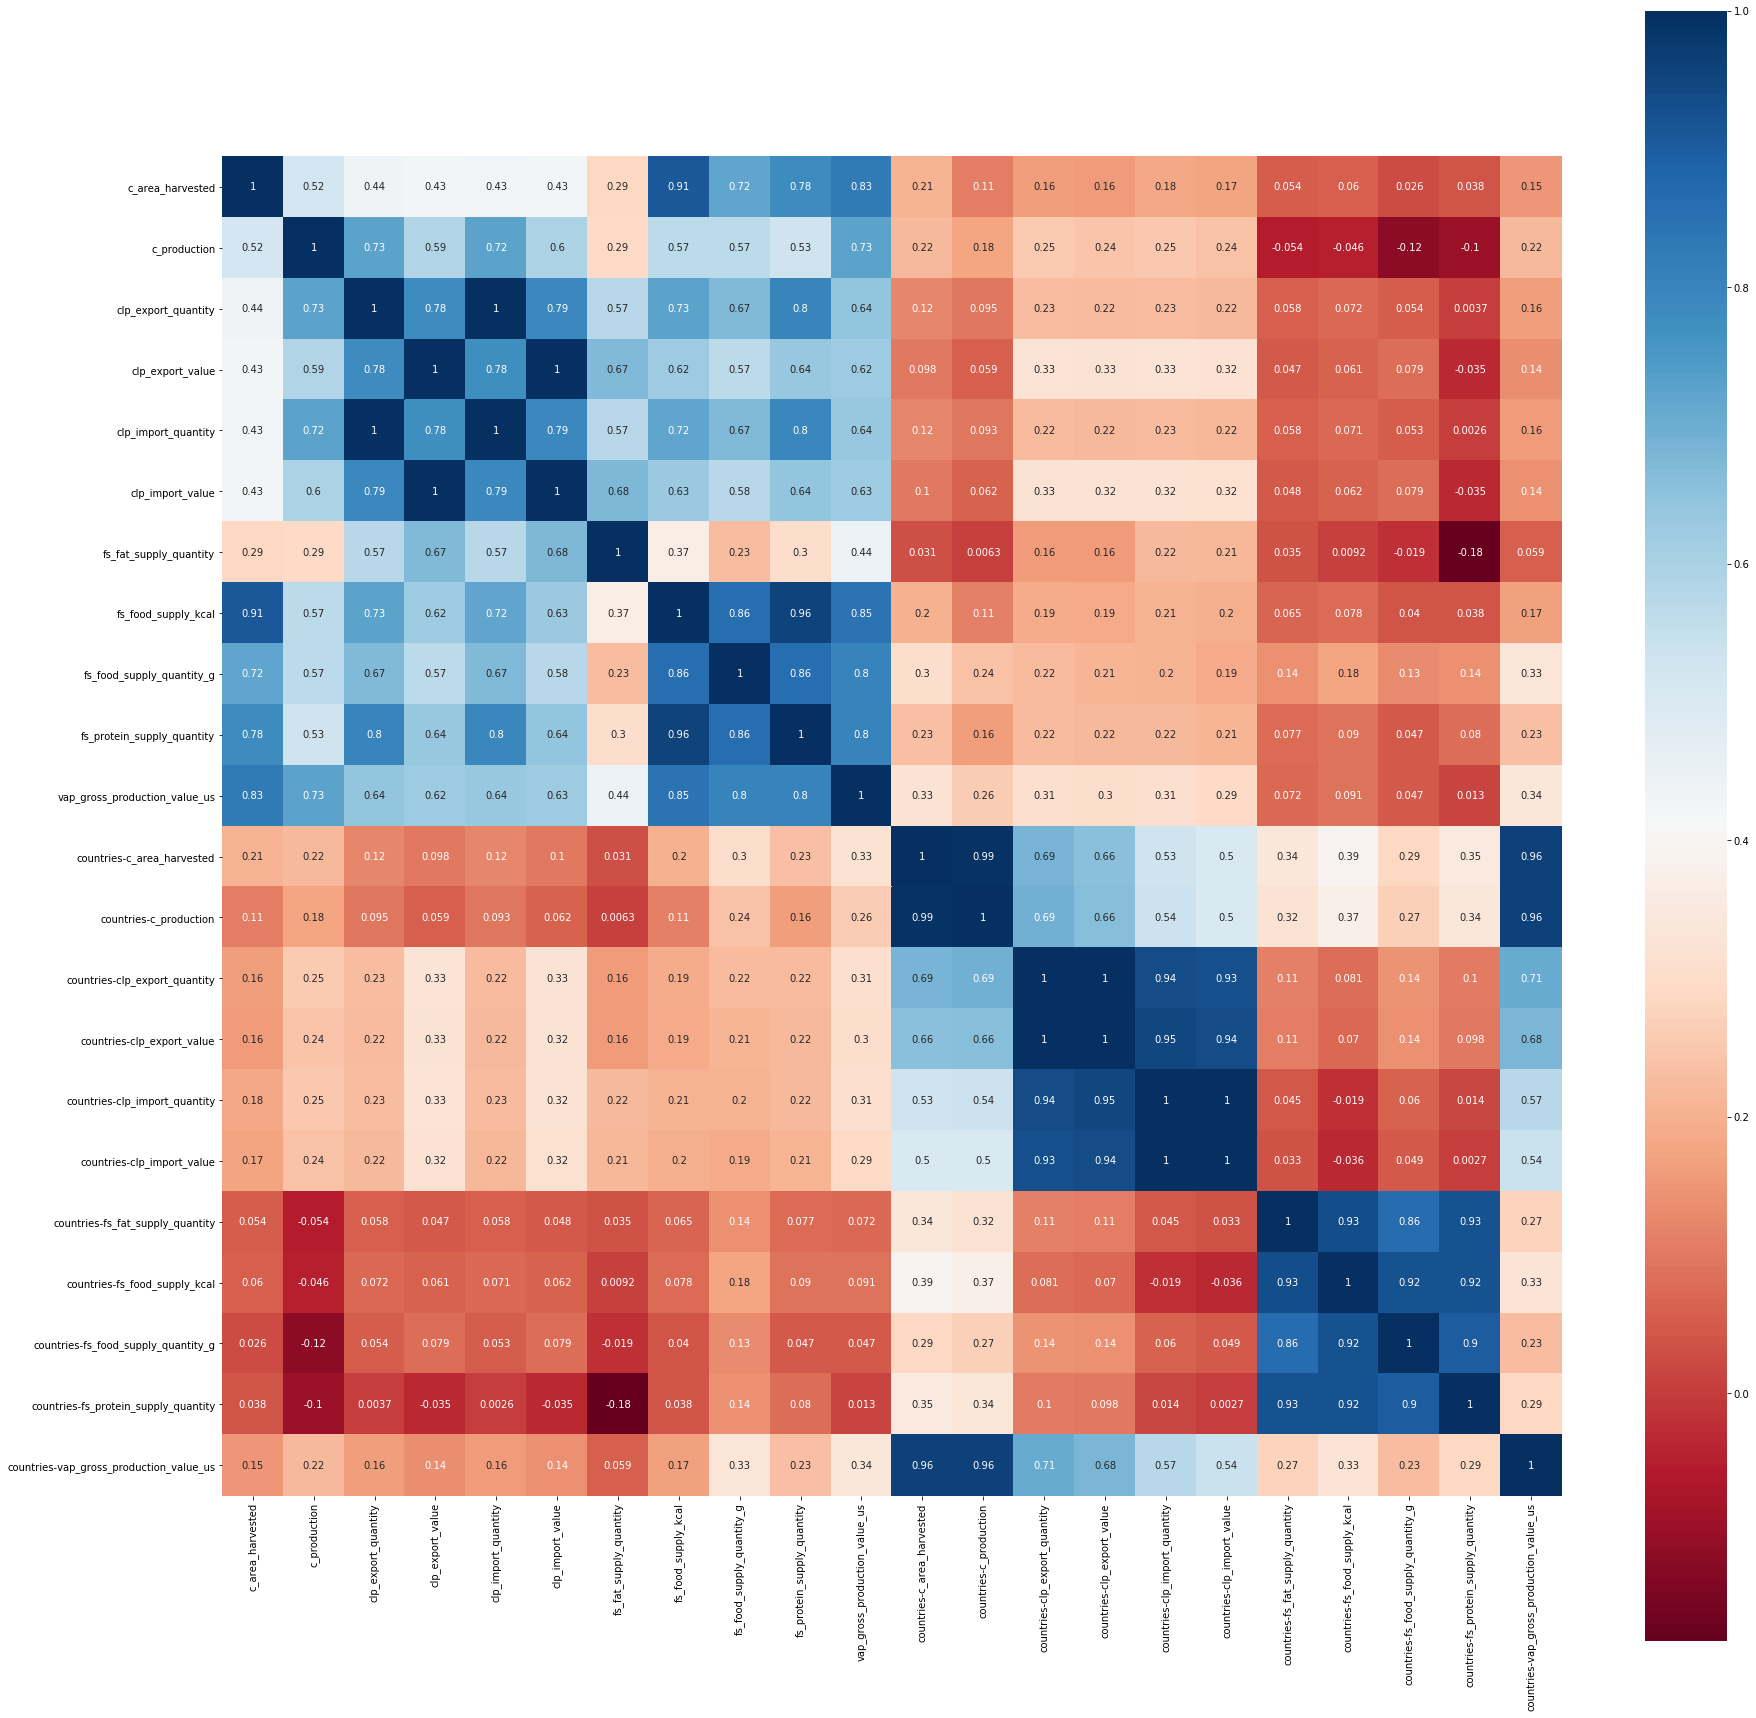

In [17]:
correlation = df.loc[:, features_importance].corr(method =corr_method)
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap=paleta)
plt.savefig('features_importance.png')


In [18]:
features_supply = [
"genus_count_institution_supply",
"genus_count_origin_supply",
"species_count_institution_supply",
"species_count_origin_supply",
"genus_count_mls_supply_accessions",
"species_count_mls_supply_accessions",
"genus_count_mls_supply_institutions",
"species_count_mls_supply_institutions"]

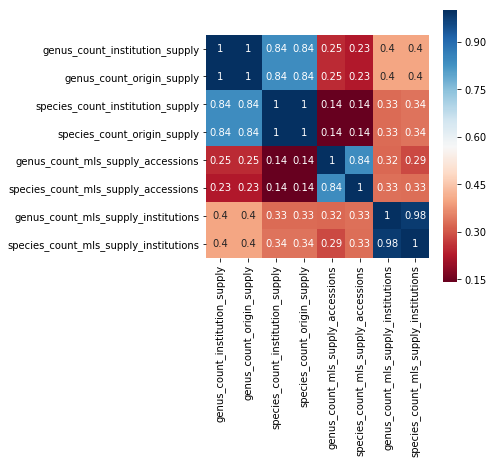

In [19]:
correlation = df.loc[:, features_supply].corr(method = corr_method)
plt.figure(figsize=(5,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap=paleta)
plt.savefig('features_supply.png')

In [20]:
features_idx = ["idx_g-production",
"idx_g-trade",
"idx_g-",
"idx_c-importance",
"idx_g-production",
"idx_g-trade",
"idx_g-food_supply",
"idx_c-faostat_count_countries",
"idx_d-importance",
"idx_final",
"idx_g-upov_varietal_release",
"idx_c-demand-varietal_release",
"idx_d-demand",
"idx_g-institution_country",
"idx_g-origin_country",
"idx_c-supply-genebank_collections",
"idx_g-germplasm_mls_accessions",
"idx_g-germplasm_mls_institutions",
"idx_c-germplasm_mls",
"idx_d-supply",
"idx_g-gini_genebanks_institution_country",
"idx_g-gini_genebanks_origin_country",
"idx_c-equality_of_supply",
"idx_d-security"]

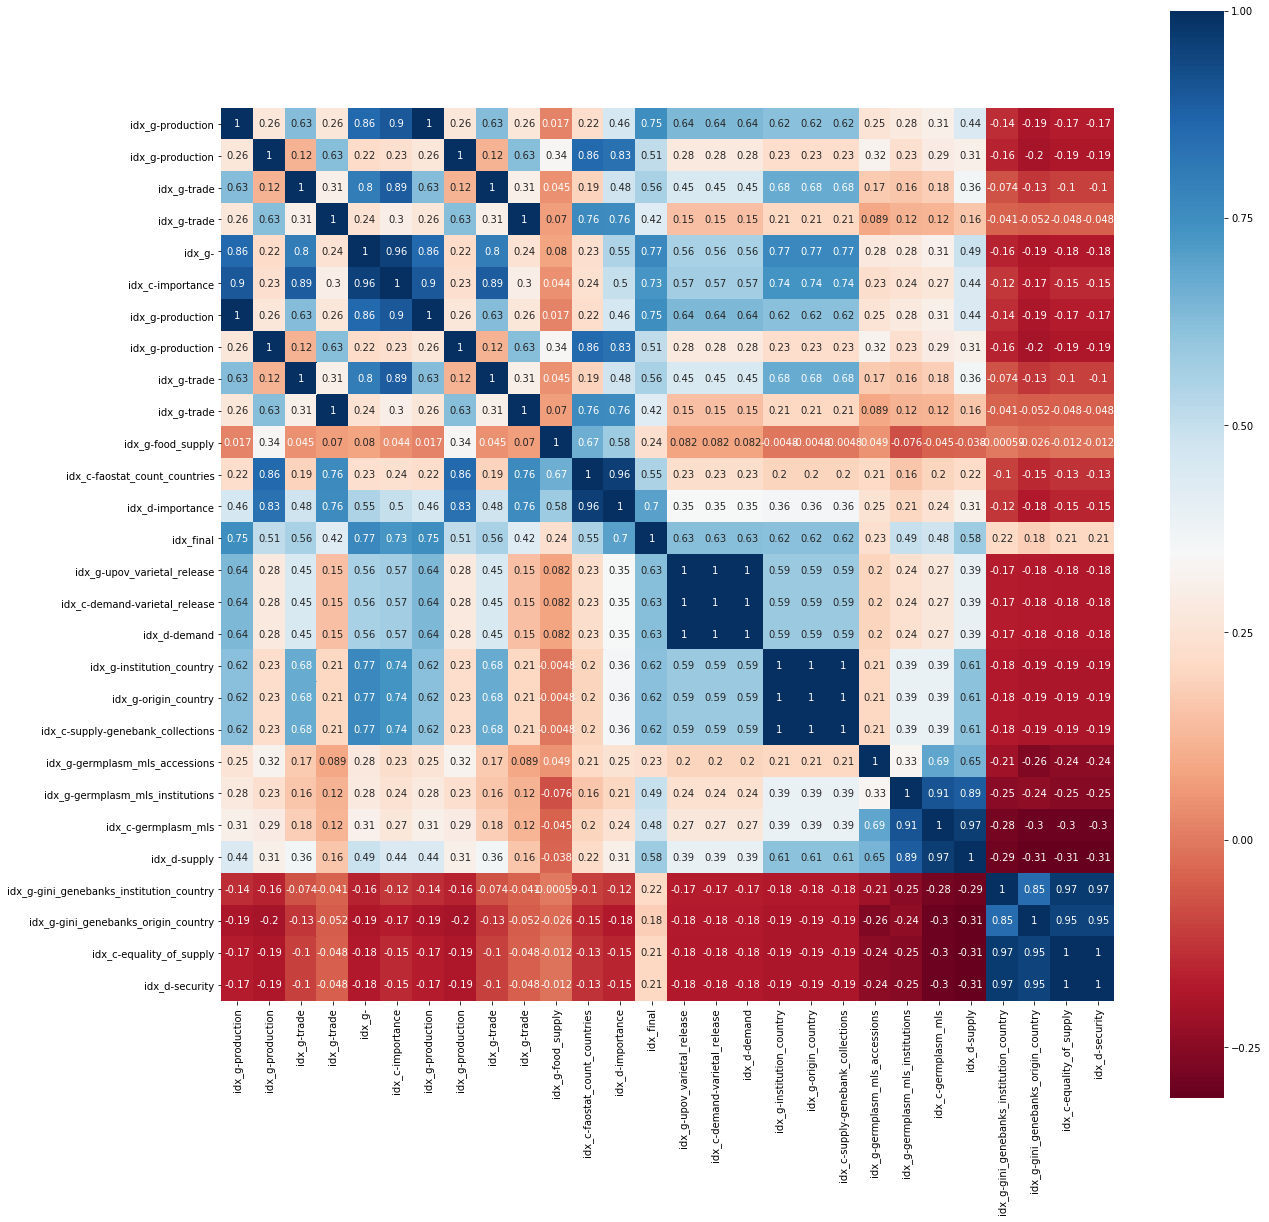

In [21]:
correlation = df.loc[:, features_idx].corr(method = corr_method)
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap=paleta)
plt.savefig('features_idx.png')

## PCA

In [ ]:
features_opt= features_normal

from sklearn.decomposition import PCA

X_tsne = TSNE(learning_rate=100).fit_transform(df.loc[:, features_opt].values)
X_pca = PCA().fit_transform(df.loc[:, features_opt].values)